# Joy for Pynq 

In this notebook, opencv face detection will be applied to webcam live video and emotions of the user is depicted via an Animoji.

To run all cells in this notebook a webcam and HDMI output monitor are required.  

References:

https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

### Step 1: Load the overlay, the dependency packages and the connect to the azure emotion api

In [1]:
#
# FileName        :    PYNQ_Animoji.py
# Description     :    This file contains multithreaded file I/O implementation 
#                        
# File Author Name:    Bhallaji Venkatesan, Divya Sampath, Mounika Reddy, Sahana Sadagopan 
# Tools used      :    Jupyter Notebooks, 
# References      :    www.pynq.io 
#				  :	   http://docs.opencv.org/2.4/doc/tutorials/tutorials.html
#                 :    https://azure.microsoft.com/en-us/services/cognitive-services/emotion/
#                   
#
#
#/


from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
from matplotlib import pyplot as plt
import numpy as np
#import Image 
from PIL import Image 
orig_img_path = '/home/xilinx/jupyter_notebooks/base/video/mj2.jpeg'
base = BaseOverlay("base.bit")

import requests 
import json
import os
import re
import numpy as np
url_Microsoft_Cog_Services = 'https://westus.api.cognitive.microsoft.com/emotion/v1.0/recognize?'
Image_url = 'frame.jpg'
#Header for Microsoft Cognitive Services requests
headers = {
    # Request headers #To confirm octet or json
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': 'a6a9555023d74986a23d4a6935274f88',
}

#Parameters for Microsoft Cognitive Services requests
params =  {
}

### Step 2: Initialize Webcam and HDMI Out

In [2]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
hdmi_out = base.video.hdmi_out

hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

In [3]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [4]:
# initialize camera from OpenCV
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))


Capture device is open: True


### Step 3: Capturing, processing and sending data to Azuze Software 

<Response [200]>
[{'faceRectangle': {'height': 233, 'left': 158, 'top': 103, 'width': 233}, 'scores': {'anger': 9.164221e-12, 'contempt': 3.139753e-11, 'disgust': 2.16355444e-13, 'fear': 7.152358e-14, 'happiness': 1.0, 'neutral': 2.75414219e-10, 'sadness': 1.807345e-13, 'surprise': 1.39650288e-11}}]


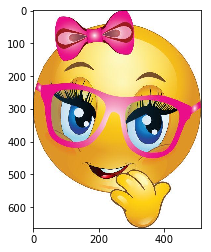

The Person is happy! THEY MUST BE USING PYNQ BOARD
4
<Response [200]>
[{'faceRectangle': {'height': 219, 'left': 167, 'top': 114, 'width': 219}, 'scores': {'anger': 3.646588e-09, 'contempt': 1.12893712e-08, 'disgust': 1.68261668e-10, 'fear': 1.47833568e-11, 'happiness': 0.99999994, 'neutral': 1.44294692e-08, 'sadness': 2.42736109e-11, 'surprise': 7.739077e-10}}]


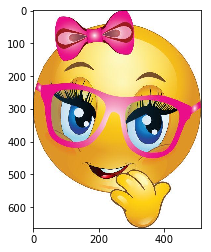

The Person is happy! THEY MUST BE USING PYNQ BOARD
4
<Response [200]>
[{'faceRectangle': {'height': 230, 'left': 162, 'top': 112, 'width': 230}, 'scores': {'anger': 1.085243e-12, 'contempt': 8.184508e-12, 'disgust': 5.54036018e-14, 'fear': 9.891422e-15, 'happiness': 1.0, 'neutral': 5.19055771e-11, 'sadness': 1.99911329e-14, 'surprise': 3.51211876e-12}}]


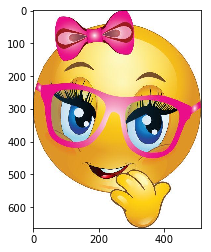

The Person is happy! THEY MUST BE USING PYNQ BOARD
4
<Response [200]>
[{'faceRectangle': {'height': 219, 'left': 171, 'top': 124, 'width': 219}, 'scores': {'anger': 8.27053842e-11, 'contempt': 4.709376e-10, 'disgust': 6.45337126e-12, 'fear': 3.34290768e-14, 'happiness': 1.0, 'neutral': 9.007468e-10, 'sadness': 5.268834e-13, 'surprise': 1.24582887e-11}}]


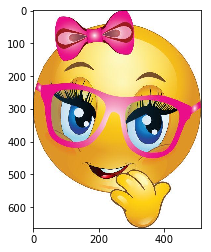

The Person is happy! THEY MUST BE USING PYNQ BOARD
4
<Response [200]>
[{'faceRectangle': {'height': 218, 'left': 174, 'top': 122, 'width': 218}, 'scores': {'anger': 2.4471844e-10, 'contempt': 1.42981227e-09, 'disgust': 2.80726171e-11, 'fear': 9.722045e-13, 'happiness': 1.0, 'neutral': 3.63190034e-09, 'sadness': 2.80733531e-12, 'surprise': 1.14728733e-10}}]


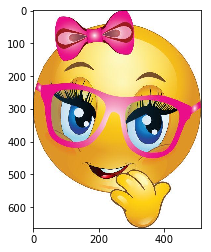

The Person is happy! THEY MUST BE USING PYNQ BOARD
4
<Response [200]>
[{'faceRectangle': {'height': 238, 'left': 209, 'top': 43, 'width': 238}, 'scores': {'anger': 3.33938e-09, 'contempt': 6.526331e-08, 'disgust': 3.28636479e-10, 'fear': 1.40949044e-10, 'happiness': 0.9999983, 'neutral': 1.6353963e-06, 'sadness': 4.52055149e-09, 'surprise': 2.25600627e-09}}]


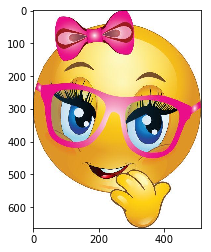

The Person is happy! THEY MUST BE USING PYNQ BOARD
4
<Response [200]>
[{'faceRectangle': {'height': 216, 'left': 156, 'top': 0, 'width': 249}, 'scores': {'anger': 0.000573225, 'contempt': 0.00159983081, 'disgust': 0.000607882044, 'fear': 0.000295192556, 'happiness': 0.00023623895, 'neutral': 0.989055157, 'sadness': 0.00554521848, 'surprise': 0.00208724546}}]
THE PERSON IS NEUTRAL


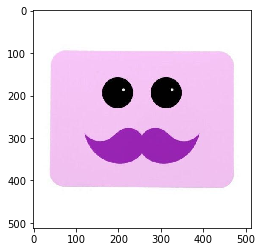

5
<Response [200]>
[{'faceRectangle': {'height': 225, 'left': 152, 'top': 0, 'width': 252}, 'scores': {'anger': 0.00174124481, 'contempt': 0.00443064841, 'disgust': 0.00130421913, 'fear': 0.000213013525, 'happiness': 0.0004859671, 'neutral': 0.9812683, 'sadness': 0.009086644, 'surprise': 0.001469963}}]
THE PERSON IS NEUTRAL


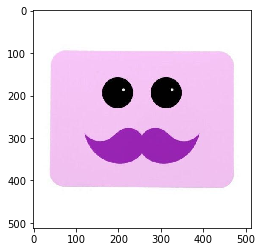

5
<Response [200]>
[{'faceRectangle': {'height': 242, 'left': 113, 'top': 0, 'width': 244}, 'scores': {'anger': 0.0128979431, 'contempt': 0.002418451, 'disgust': 0.0008128826, 'fear': 0.00012953105, 'happiness': 0.000385737367, 'neutral': 0.975843966, 'sadness': 0.007056855, 'surprise': 0.000454631925}}]
THE PERSON IS NEUTRAL


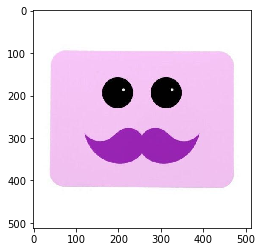

5
<Response [200]>
[]


IndexError: list index out of range

In [5]:
# Capture webcam image
import numpy as np
import PIL
import pyscreenshot as ImageGrab
from pynq.lib.arduino import Grove_Buzzer
from pynq.lib.arduino import ARDUINO_GROVE_G1

# Face Recognition with face demarcation
while(True):
    ret, frame_vga = videoIn.read()
    if (ret):      
        np_frame = frame_vga
        face_cascade = cv2.CascadeClassifier(
            '/home/xilinx/jupyter_notebooks/base/video/data/'
            'haarcascade_frontalface_default.xml')
        gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:
            cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = np_frame[y:y+h, x:x+w]

        outframe = hdmi_out.newframe()
        outframe[0:480,0:640,:] = np_frame[0:480,0:640,:]
        hdmi_out.writeframe(outframe)
        cv2.imwrite("frame.jpg",frame_vga)
        

#Capturing Image of the requested Item
#Converting the Image into a readable binary file for passing to the Microsoft Cognitive Services
        with open (Image_url, 'rb') as f:
            data2 = f.read()
#Http Post request to the Microsoft Cognitive Services 	
        response= requests.request('post',url_Microsoft_Cog_Services,json =json, data = data2, headers = headers, params = params)
        print(response)
        data = response.json()
        print(data)
#Searching for Pattern of the required items in the image response from cognitive services

        array = np.zeros(8)
        array[0] = data[0]['scores']['anger']
        array[1] = data[0]['scores']['contempt']
        array[2] = data[0]['scores']['disgust']
        array[3] = data[0]['scores']['fear']
        array[4] = data[0]['scores']['happiness']
        array[5] = data[0]['scores']['neutral']
        array[6] = data[0]['scores']['sadness']
        array[7] = data[0]['scores']['surprise']
        max_value = array[0]
        max_index = 0


        for i in range(0,7):
            if array[i]>max_value:
                max_value = array[i]
                max_index = i
            else:
                pass
#Emoji Implementation             
        if(max_index == 0):
            print("THE PERSON IS REALLY REALLY ANGERY")
            print("Probably not using PYNQ")
            %matplotlib inline 
            n_plot = cv2.imread("Angry.jpg")
            from matplotlib import pyplot as plt
            import numpy as np
            plt.imshow(n_plot[:,:,[2,1,0]])
            plt.show()
        if(max_index == 1):
            print("THE PERSON IS CONTEMPT")
        if(max_index == 2):
            print("THE PERSON IS REALLY DISGUSTED")
        if(max_index == 3):
            print("THE PERSON IS SCARED")
        if(max_index == 4):
            # Output webcam image as JPEG
            %matplotlib inline 
            n_plot = cv2.imread("Happy.jpg")
            from matplotlib import pyplot as plt
            import numpy as np
            plt.imshow(n_plot[:,:,[2,1,0]])
            plt.show()
            print("The Person is happy! THEY MUST BE USING PYNQ BOARD")
        if(max_index == 5):
            print("THE PERSON IS NEUTRAL")
            %matplotlib inline 
            n_plot = cv2.imread("Neutral.jpg")
            from matplotlib import pyplot as plt
            import numpy as np
            plt.imshow(n_plot[:,:,[2,1,0]])
            plt.show()
        if(max_index == 6):
            print("THE PERSON IS SAD")
            %matplotlib inline 
            n_plot = cv2.imread("sad.jpg")
            from matplotlib import pyplot as plt
            import numpy as np
            plt.imshow(n_plot[:,:,[2,1,0]])
            plt.show()
        if(max_index ==7):
            print("THE PERSON IS SURPRISED")
            %matplotlib inline 
            n_plot = cv2.imread("Surprised.jpg")
            from matplotlib import pyplot as plt
            import numpy as np
            plt.imshow(n_plot[:,:,[2,1,0]])
            plt.show()
        print(max_index)
        #cv2.waitKey(50)
        
    else:
        raise RuntimeError("Failed to read from camera.")
            

### Step 8: Release camera and HDMI

In [14]:
videoIn.release()
hdmi_out.stop()
del hdmi_out